Sales Data Analysis

 1. WHAT IS FEATHER & HOW TO READ DATA FROM FEATHER!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
!pip install pyarrow

In [7]:
all_data = pd.read_feather(r"C:\Users\Tanu\Downloads\Sales_Analysis/Sales_data.ftr")

In [8]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [10]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
all_data.shape

(186850, 6)

In [17]:
all_data = all_data.dropna(how = "all")

In [18]:
all_data.shape

(186305, 6)

In [19]:
all_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [20]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [23]:
all_data = all_data.drop_duplicates()

In [24]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


2. WHICH IS THE BEST MONTH FOR SALE?

In [25]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [26]:
all_data["Order Date"]

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185687, dtype: object

In [27]:
all_data["Order Date"][0]

'04/19/19 08:46'

In [28]:
type(all_data["Order Date"][0])

str

In [29]:
all_data["Order Date"].str.split(' ')

0         [04/19/19, 08:46]
2         [04/07/19, 22:30]
3         [04/12/19, 14:38]
4         [04/12/19, 14:38]
5         [04/30/19, 09:27]
                ...        
186845    [09/17/19, 20:56]
186846    [09/01/19, 16:00]
186847    [09/23/19, 07:39]
186848    [09/19/19, 17:30]
186849    [09/30/19, 00:18]
Name: Order Date, Length: 185687, dtype: object

In [32]:
all_data["Month"] = all_data["Order Date"].str.split('/').str[0]

In [33]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [34]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [54]:
all_data["Month"].astype(int)

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185686, dtype: int64

In [36]:
all_data["Month"].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [37]:
filter1 = all_data["Month"] == 'Order Date'

In [38]:
all_data[filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [40]:
all_data = all_data[~filter1]

In [41]:
all_data.shape

(185686, 7)

In [44]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [43]:
all_data["Month"] = all_data["Month"].astype(int)

In [45]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [46]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(int)
all_data["Price Each"] = all_data["Price Each"].astype(float)

In [47]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [48]:
all_data["Quantity Ordered"]* all_data["Price Each"]

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Length: 185686, dtype: float64

In [49]:
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


In [50]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


In [56]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] ## creating sales feature

In [57]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales'],
      dtype='object')

In [59]:
all_data.groupby("Month")["sales"].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

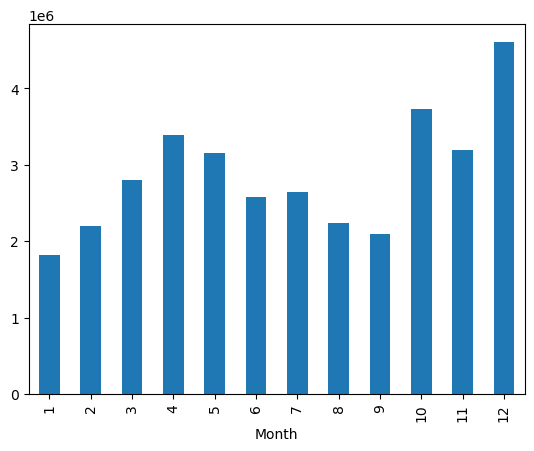

In [60]:
all_data.groupby("Month")["sales"].sum().plot(kind= "bar")

In [61]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [62]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [63]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [66]:
all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [67]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [68]:
pd.value_counts(all_data['city'])

city
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

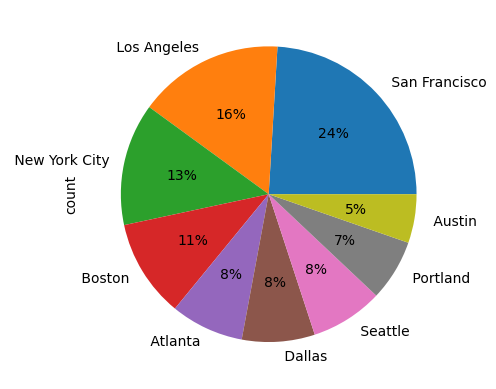

In [73]:
pd.value_counts(all_data['city']).plot(kind='pie', autopct = '%1.0f%%')

In [74]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [76]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})

In [81]:
count_df = count_df.reset_index()

In [88]:
products = count_df['Product'].values

Text(0, 0.5, 'Avg price of product')

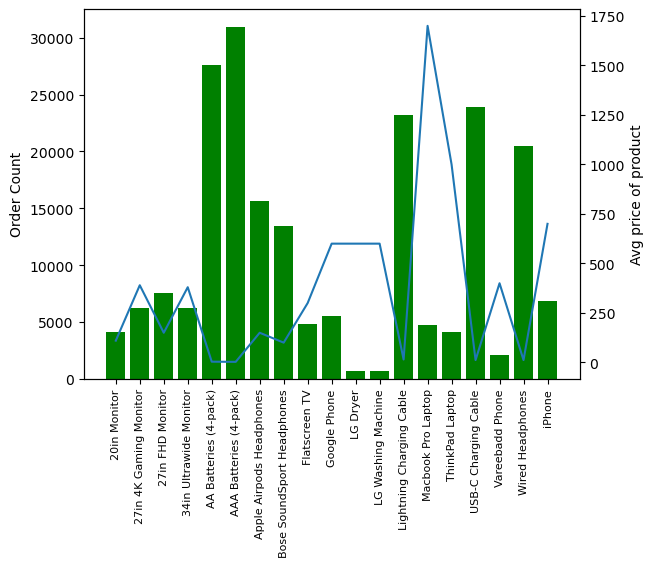

In [90]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='g')
ax2.plot(count_df['Product'], count_df['Price Each'])
ax1.set_xticklabels(products , rotation='vertical',fontsize=8)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

In [96]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [97]:
most_sold_product = all_data['Product'].value_counts()[0:5].index

In [99]:
all_data['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [103]:
most_sold_product_df = all_data[all_data['Product'].isin(most_sold_product)]

In [105]:
most_sold_product_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [107]:
most_sold_product_df.groupby(['Month' , 'Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [109]:
pivot = most_sold_product_df.groupby(['Month', 'Product']).size().unstack()

<Axes: xlabel='Month'>

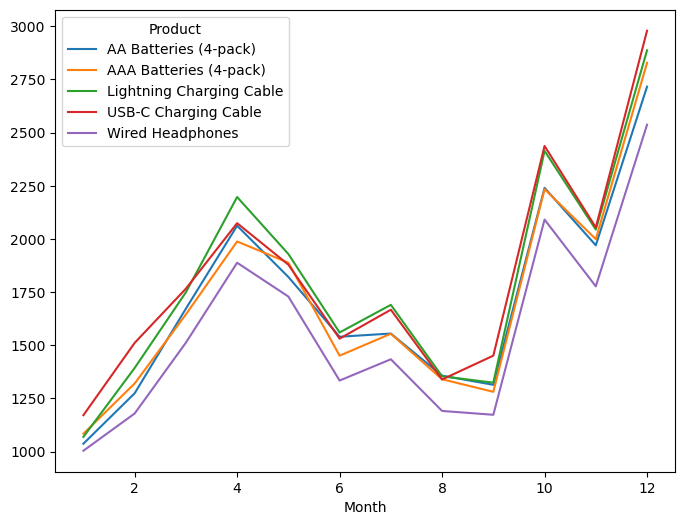

In [110]:
pivot.plot(figsize=(8,6))

In [111]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [112]:
all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [115]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [116]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [120]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

In [121]:
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [122]:
dup_products_df = df_duplicated.merge(dup_products , how='left', on='Order ID')

In [123]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [124]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

In [125]:
no_dup_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


<Axes: ylabel='count'>

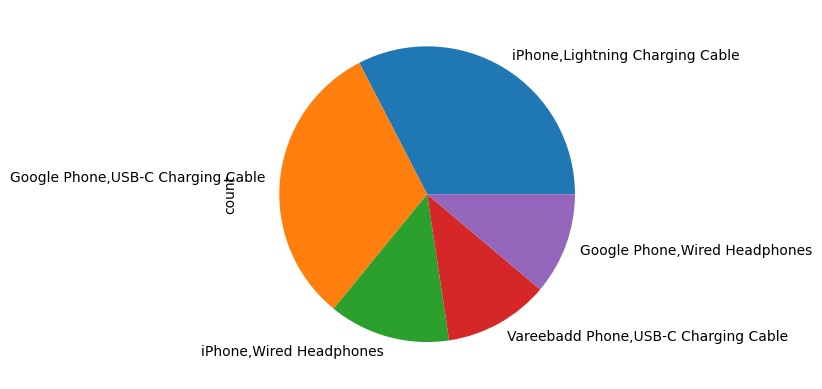

In [129]:
no_dup_df['grouped_products'].value_counts()[0:5].plot.pie()

In [130]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [131]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
sales               float64
city                 object
dtype: object

In [140]:
all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour

In [141]:
all_data.head(8)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,7
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,10


In [143]:
all_data.groupby('Hour')['sales'].sum()

Hour
0      713548.66
1      460563.90
2      234839.45
3      145742.94
4      162546.07
5      230664.87
6      447963.01
7      744067.32
8     1192309.20
9     1638784.04
10    1942988.08
11    2296619.84
12    2314359.85
13    2152369.98
14    2082513.70
15    1940623.20
16    1902523.20
17    2126553.97
18    2218374.01
19    2411971.14
20    2280784.36
21    2040790.48
22    1606243.85
23    1177792.82
Name: sales, dtype: float64

In [ ]:
all_data.goupby('Hour')['sales'].sum().plot()

In [ ]:
all_data.columns

In [144]:
pivot = all_data.pivot_table(index= "Hour", columns= "city", values="sales", aggfunc="sum")

city,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
Hour,,,,,,,,,
0,62855.02,38095.54,77524.83,45103.93,106176.92,100208.77,46795.29,175921.20,60867.16
1,44443.32,20479.19,48987.45,35310.27,77638.97,71811.12,32359.77,97799.86,31733.95
2,25199.15,15070.52,22018.01,24782.04,34805.51,29175.02,17110.58,50964.17,15714.45
3,7018.49,5957.97,14219.26,14265.28,23673.84,16340.06,11592.08,42127.03,10548.93
4,18954.97,5412.40,21245.82,6769.99,22877.18,20139.72,9621.42,41175.81,16348.76
5,18477.55,12787.88,16447.00,17891.68,37931.63,40200.56,11836.02,53521.90,21570.65
6,39447.56,18528.47,54194.75,36909.89,66811.50,66249.66,34290.75,96635.83,34894.60
7,69861.95,40585.92,68517.54,67286.82,116219.27,101404.71,59898.95,168245.68,52046.48
8,106015.06,60812.95,144361.50,92531.24,172561.11,165058.15,73046.53,283928.39,93994.27


In [145]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Product', ylabel='Month'>

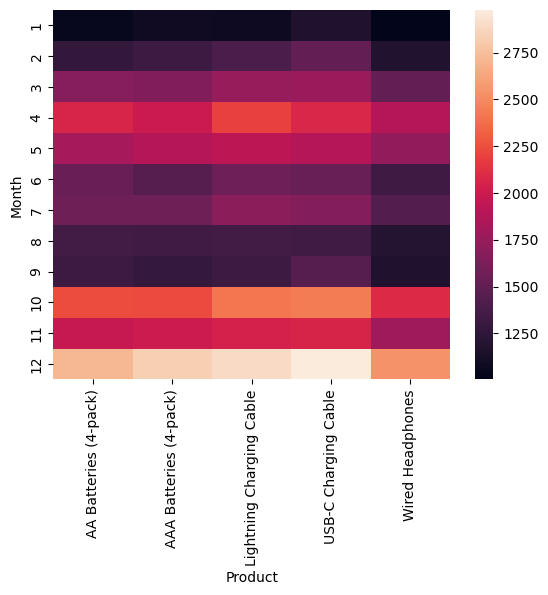

In [146]:
sns.heatmap(pivot)

In [147]:
import plotly.express as px

In [153]:
fig = px.imshow(pivot , 
         labels= dict(x = "City" , y = "Hour", color= "Total Sales"),
         x = pivot.columns , 
         y = pivot.index ,
         title= "Hourly Heatmap Sales by City",
         color_continuous_scale= "Inferno")

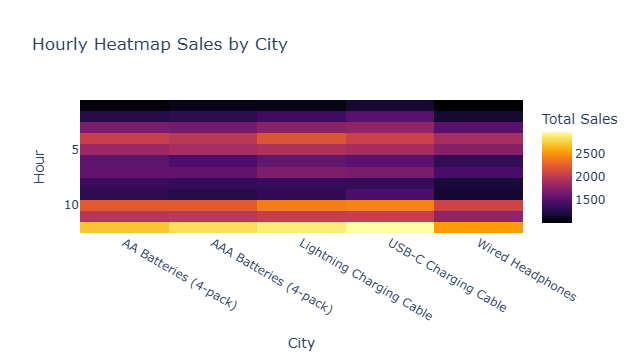

In [154]:
fig